In [1]:
from astropy import units as u
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
import pickle
import os
import glob
import shutil
import random

from fil_finder import FilFinder2D

from cube_fil_finder.galfa import galfa_util
from cube_fil_finder.util import cube_util, cube_moments

%matplotlib inline

### modify these for you own data locations


`pickle_file_all_trees`: this file should contain the actual pickled tree structures

`galfa_file_sample`: this could be any GALFA slice, it's used later for its header info

In [2]:
pickle_file_all_trees = '../../pickled_dicts/fourth_batch/all_trees_1_8.p'
galfa_file_sample = '/Volumes/LarryExternal1/Research_2017/GALFA_slices_backup/unprocessed_slices_from_susan/GALFA_HI_W_S0955_V-050.4kms.fits'

In [3]:
trees = pickle.load(open(pickle_file_all_trees, 'rb'))  # dict of tree objects
ex_hdr = fits.getheader(galfa_file_sample)

In [4]:
ex_hdr['BUNIT'] = 'k'  # this is a workaround for filfinder

choose your own `tree_key` here: it should be a key in `trees`, which should correspond to the __id__ column of the datafile

In [5]:
tree_key = '5184_1025_0'  # example key
tree = trees[tree_key]

In [17]:
def graph_width_comp_for_tree(tree, key, usm=True):
    data_cube_raw = galfa_util.get_galfa_data_cube_from_tree(tree, cube_type='raw')
    data_cube_umask = galfa_util.get_galfa_data_cube_from_tree(tree, cube_type='umask30')
    
    moment_0_map_raw_pre_umask = np.nan_to_num(cube_moments.moment_0_from_cube(data_cube_raw))
    if usm:
        moment_0_map_raw = cube_util.umask(moment_0_map_raw_pre_umask, radius=30, filter_opt='gaussian')
    else:
        moment_0_map_raw = moment_0_map_raw_pre_umask

    moment_0_map_umask = np.nan_to_num(cube_moments.moment_0_from_cube(data_cube_umask))
    
    raw_name = 'raw' if usm else 'raw_noUSM'
    fils_raw = FilFinder2D(moment_0_map_raw, header=ex_hdr, distance=100. * u.pc, beamwidth=4. * u.arcmin,
                           mask=tree.root_node.mask,
                           save_name='{0}_{1}'.format(key, raw_name))
    fils_raw.preprocess_image(flatten_percent=95)
    fils_raw.create_mask(use_existing_mask=True, save_png=True, verbose=True)
    fils_raw.medskel(save_png=True, verbose=True)
    fils_raw.analyze_skeletons(skel_thresh=.1 * 8 * u.pc)
    #plt.imshow(fils_raw.skeleton, origin='lower')
    fils_raw.exec_rht()
    fils_raw.find_widths(try_nonparam=False, auto_cut=False,
                     max_dist=.5 * u.pc, save_png=True,
                     use_longest_path=False, add_width_to_length=False,
                     deconvolve_width=False, xunit=u.pc, verbose=True)

    
    fils_umask = FilFinder2D(moment_0_map_umask, header=ex_hdr, distance=100. * u.pc, beamwidth=4. * u.arcmin,
                             mask=tree.root_node.mask, save_name='{0}_umask'.format(key))
    fils_umask.preprocess_image(flatten_percent=95)
    fils_umask.create_mask(use_existing_mask=True, save_png=True, verbose=True)
    fils_umask.medskel(save_png=True, verbose=True)
    fils_umask.analyze_skeletons(skel_thresh=.1 * 8 * u.pc)
    #plt.imshow(fils_raw.skeleton_longpath, origin='lower')
    fils_umask.exec_rht()
    fils_umask.find_widths(try_nonparam=False, auto_cut=False, 
                           use_longest_path=False, max_dist=0.5 * u.pc,
                           save_png=True, add_width_to_length=False,
                           xunit=u.pc, deconvolve_width=False, verbose=True)
    
    with open('{0}_fit_data.txt'.format(key), 'w+') as f:
        f.write('{0} \n\nskel length:'.format(key))
        f.write('\n{1}:\t{0}'.format(fils_raw.lengths(unit=u.pc), raw_name))
        f.write('\numask:\t{0}'.format(fils_umask.lengths(unit=u.pc)))
        f.write('\nfit (fwhm, fwhm_err):')
        f.write('\n{1}:\t{0}'.format(fils_raw.widths(unit=u.pc), raw_name))
        f.write('\numask:\t{0}'.format(fils_umask.widths(unit=u.pc)))
    
    out_files = glob.glob('{0}*'.format(key))
    if not os.path.exists(key):
        os.makedirs(key)
    for f in out_files:
        shutil.move(f, key)

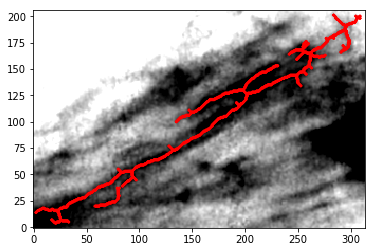

Filament: 1 / 2


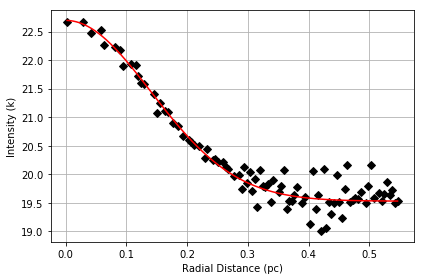

Filament: 2 / 2


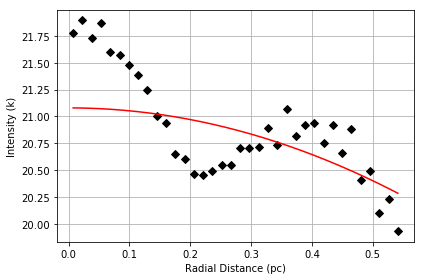

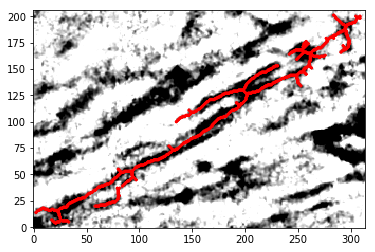

Filament: 1 / 2


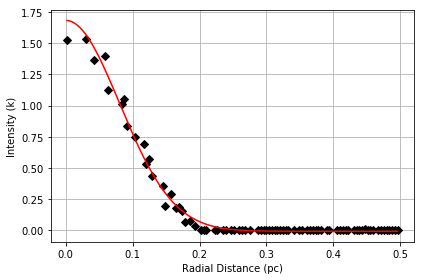

Filament: 2 / 2


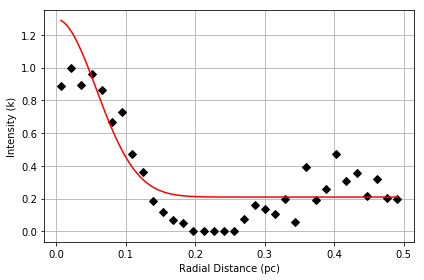

Error: Destination path '5184_1025_0/5184_1025_0_raw_noUSM_0_radprof.png' already exists

In [15]:
graph_width_comp_for_tree(tree, tree_key, usm=False)

In [16]:
junk = ["467_1074_13",
"1060_1008_0",
"2256_1035_0",
"1383_1060_0",
"1259_1063_0",
"2381_1000_0",
"881_1034_4",
"845_1029_2",
"800_1006_4",
"1039_1056_0",
"859_1000_1",
"675_971_3",
"374_1022_11",
"1978_1028_0",
"620_1013_3",
"598_1043_0",
"798_1012_3",
"756_1035_4",
"1626_1017_0",
"465_1034_8",
"2923_1029_0",
"418_1050_6",
"11019_1026_0",
"1083_1061_2",
"1969_1030_0",
"1175_1061_0",
"2029_1055_0",
"1169_1040_1",
"684_1054_7",
"940_1015_3",
"900_1066_1",
"666_1021_5",
"1280_998_0",
"743_998_1",
"1670_985_0",
"594_1022_2",
"460_1020_2",
"559_971_0",
"850_993_2",
"1020_1032_2",
"375_1057_25",
"791_1055_3",
"947_1049_0"]

In [18]:
def get_sample_keys(sample_dict, num, exclude):
    keys = sample_dict.keys()
    random.shuffle(keys)
    
    keys_sample = []
    count = 0
    for k in keys:
        if k in exclude:
            continue
        else:
            keys_sample.append(k)
            count += 1
        if count == num:
            break
    return keys_sample

In [19]:
pickle_path_all_data = '../../pickled_dicts/fourth_batch/all_trees_1_8_prop.p'
all_prop = pickle.load(open(pickle_path_all_data, 'rb'))

In [20]:
bad_trees = []
for k in all_prop:
    if len(all_prop[k]) == 0:
        bad_trees.append(k)
for k in bad_trees:
    trees.pop(k)

In [21]:
sample = get_sample_keys(trees, 50, junk)

In [22]:
sample = ['391_1049_5','460_1033_5','480_1016_4','491_1019_12','498_1023_15','520_1026_9',
          '526_1011_11','531_1001_4','531_1022_1','535_1019_11','564_1018_3','592_1015_10',
          '683_1024_2','758_1021_1','789_978_5','798_1030_0','968_1035_4','998_1012_2','1029_1036_1',
          '1072_1032_0','1095_1020_3','1120_961_0','1170_1021_1','1223_1031_5','1327_1069_1',
          '1396_1014_0','1411_1022_0','1511_1055_0','1596_1020_1','1653_955_0','1707_1012_0',
          '1856_1023_0','1933_1016_0','2182_1014_1','2225_1016_0','2426_1027_0','2439_1025_1',
          '2469_978_0','2525_1063_0','2620_1014_0','2969_1009_0','3089_1011_0','3140_1020_0',
          '3682_998_0','4399_986_0','4628_1037_0','5106_980_0','5135_1019_0','5184_1025_0','7339_1012_0']

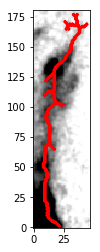

Filament: 1 / 1


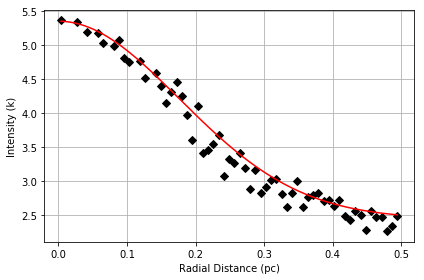

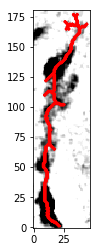

Filament: 1 / 1


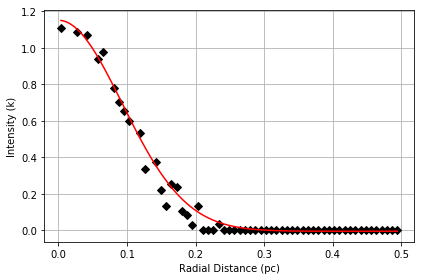

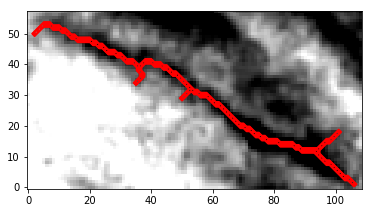

Filament: 1 / 1


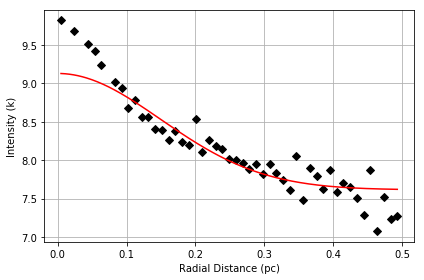

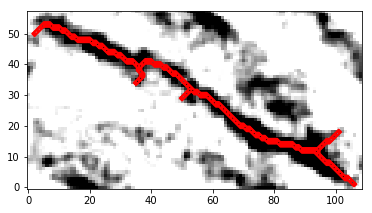

Filament: 1 / 1


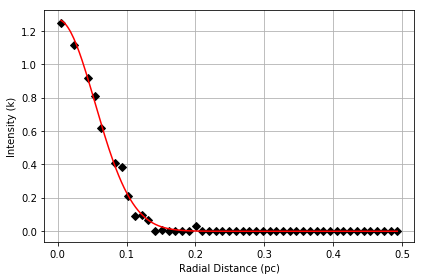

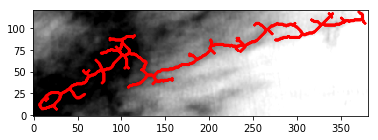

Filament: 1 / 1


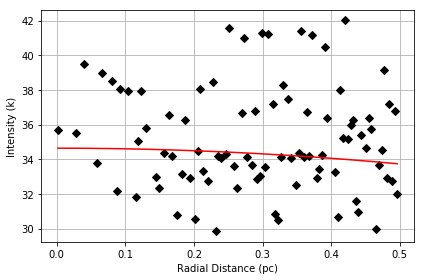

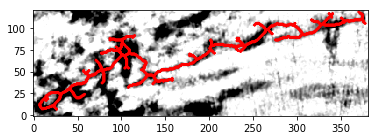

Filament: 1 / 1


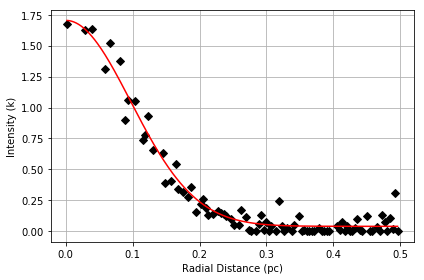

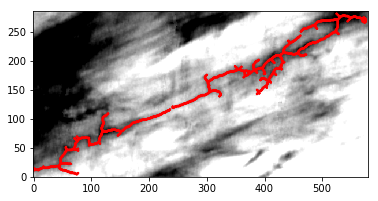

Filament: 1 / 2


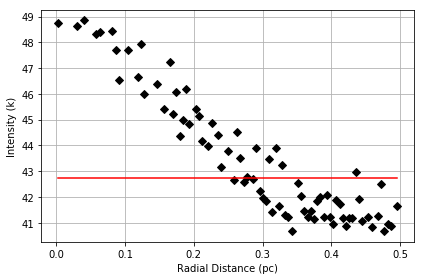

Filament: 2 / 2


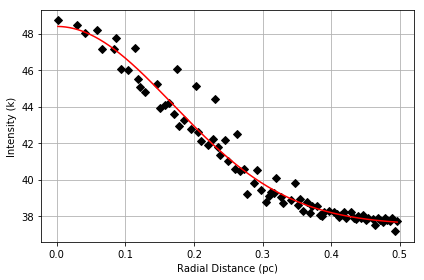

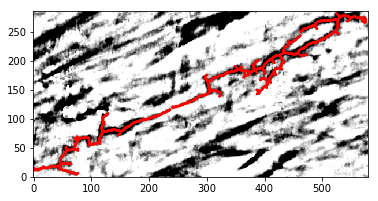

Filament: 1 / 2


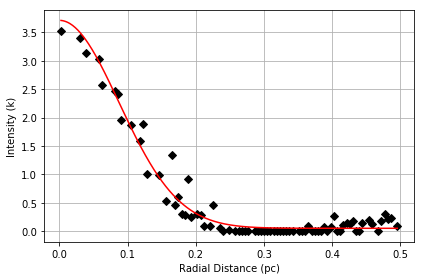

Filament: 2 / 2


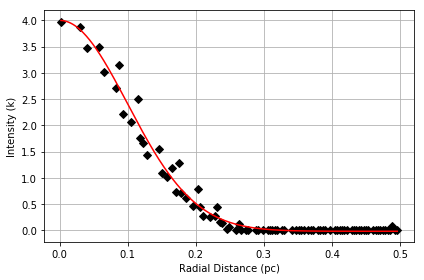

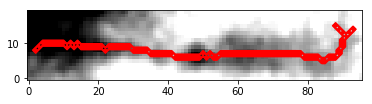

Filament: 1 / 1


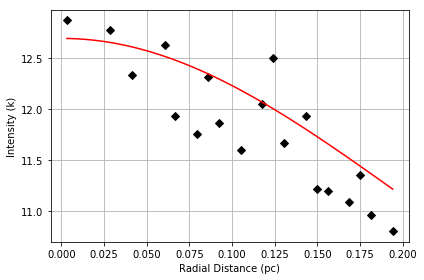

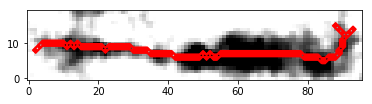

Filament: 1 / 1


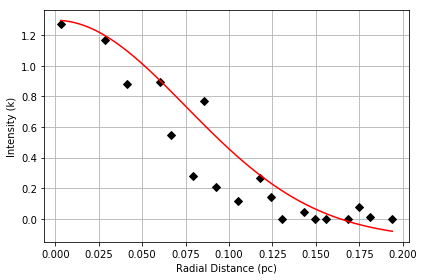

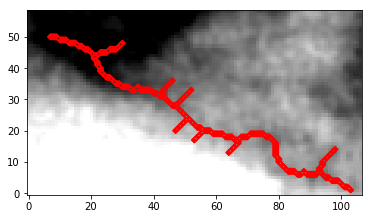

Filament: 1 / 1


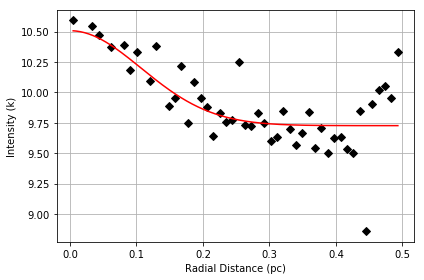

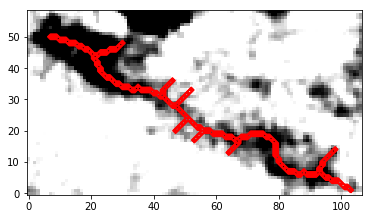

Filament: 1 / 1


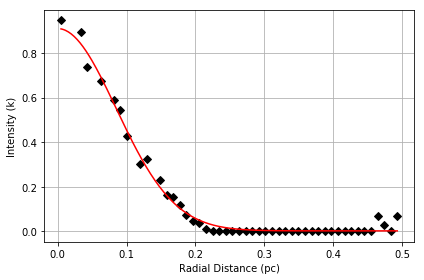

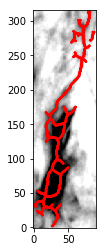

Filament: 1 / 1


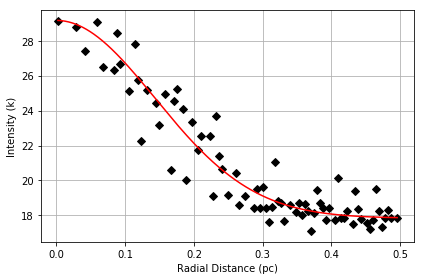

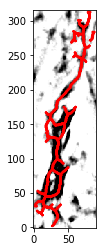

Filament: 1 / 1


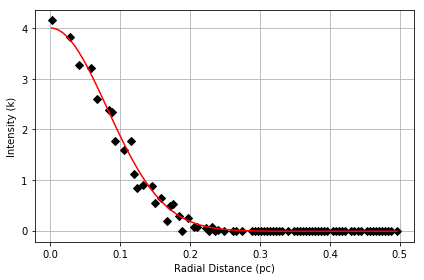

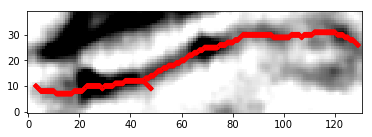

Filament: 1 / 1


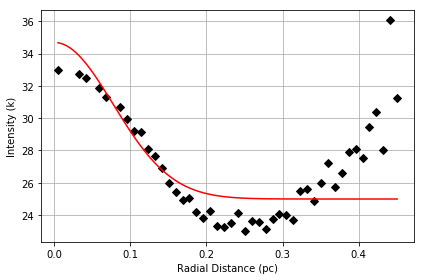

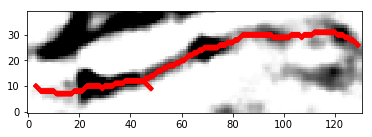

Filament: 1 / 1


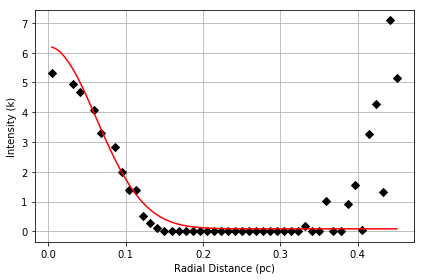

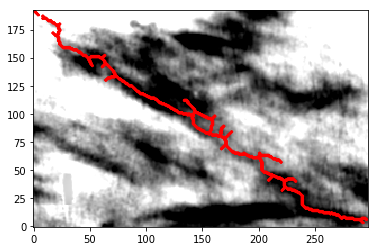

Filament: 1 / 1


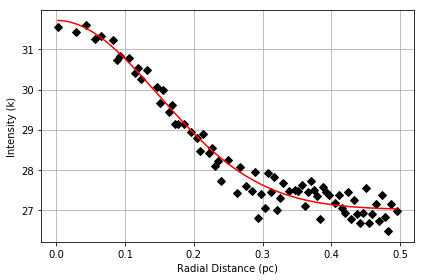

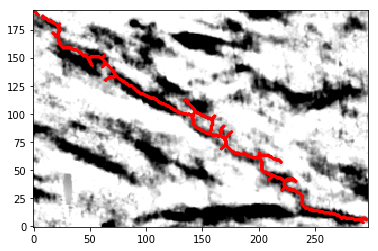

Filament: 1 / 1


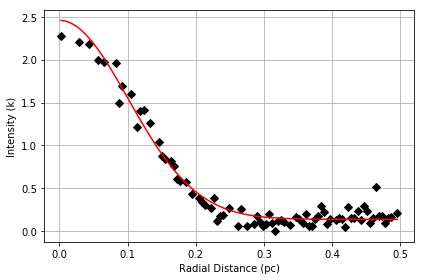

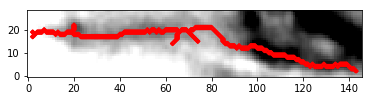

Filament: 1 / 1


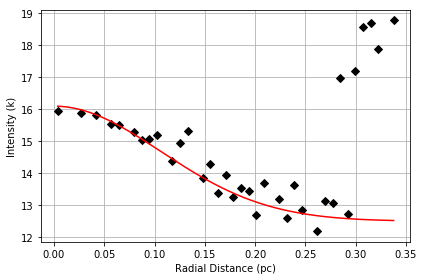

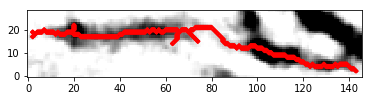

Filament: 1 / 1


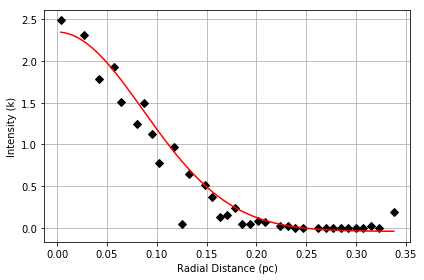

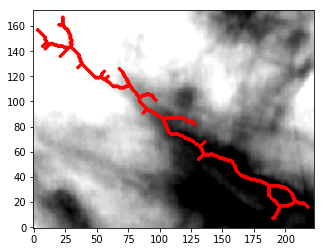

Filament: 1 / 1


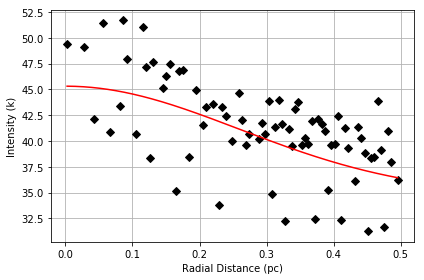

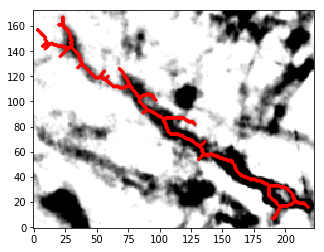

Filament: 1 / 1


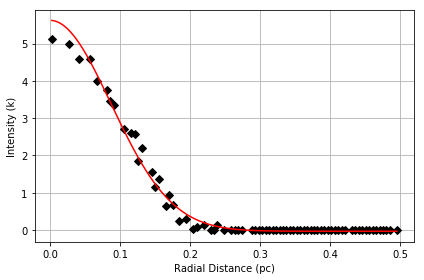

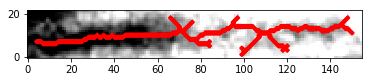

Filament: 1 / 1


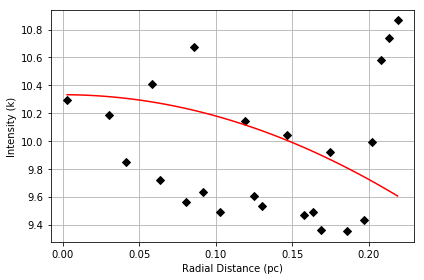

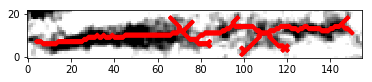

Filament: 1 / 1


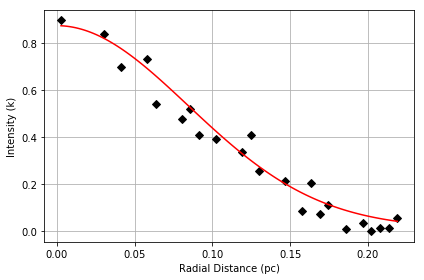

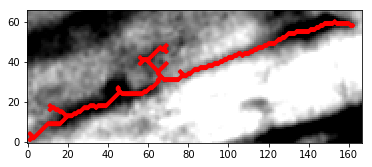

Filament: 1 / 1


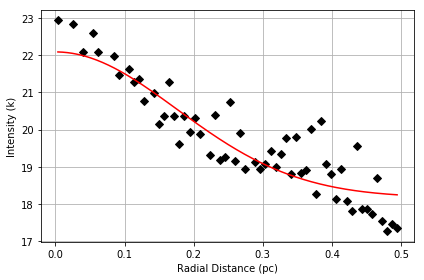

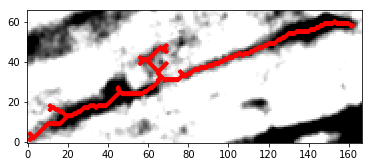

Filament: 1 / 1


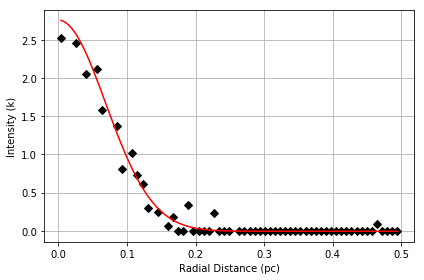

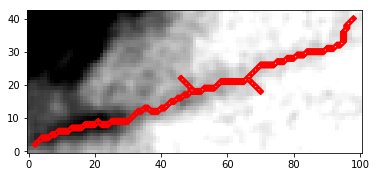

Filament: 1 / 1


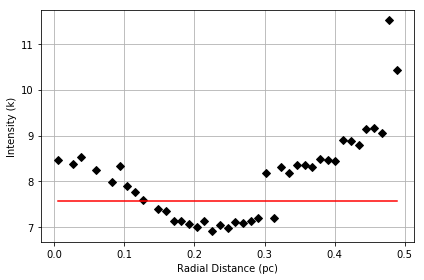

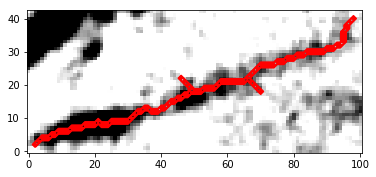

Filament: 1 / 1


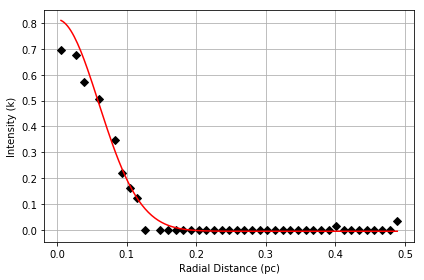

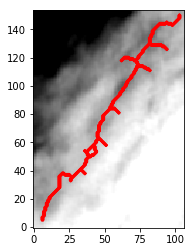

Filament: 1 / 1


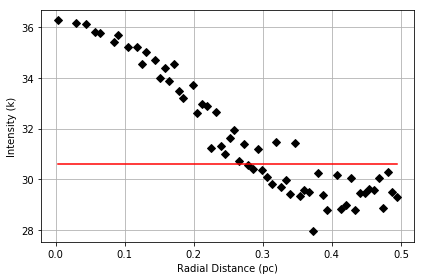

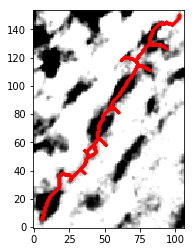

Filament: 1 / 1


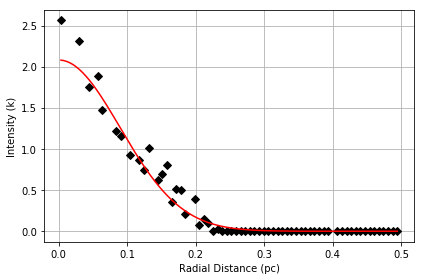

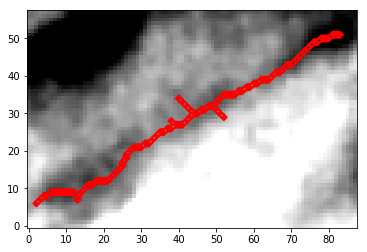

Filament: 1 / 1


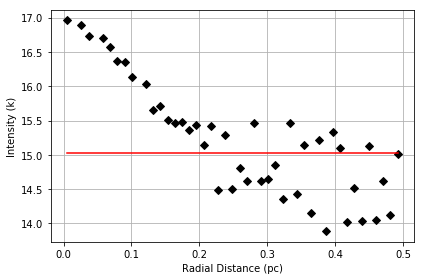

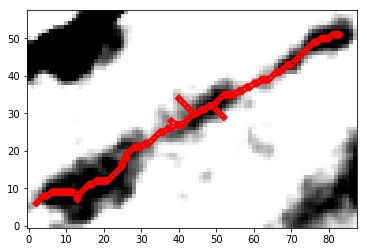

Filament: 1 / 1


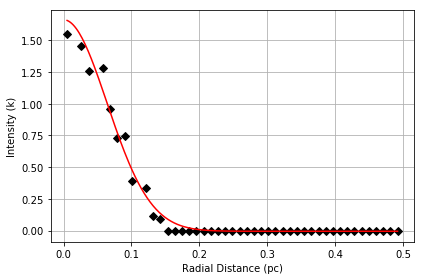

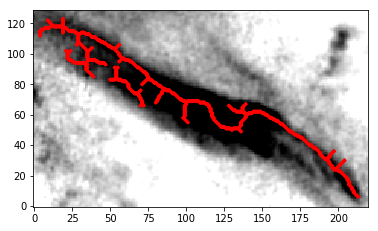

Filament: 1 / 2


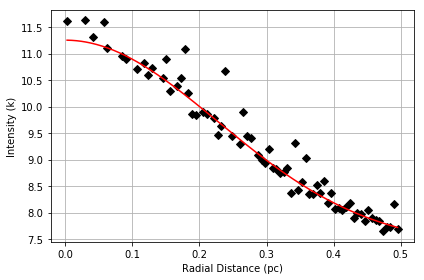

Filament: 2 / 2


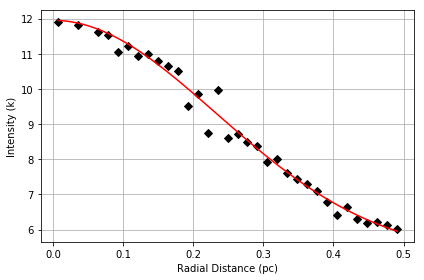

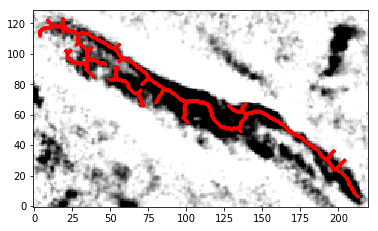

Filament: 1 / 2


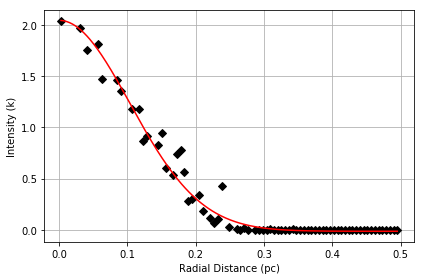

Filament: 2 / 2


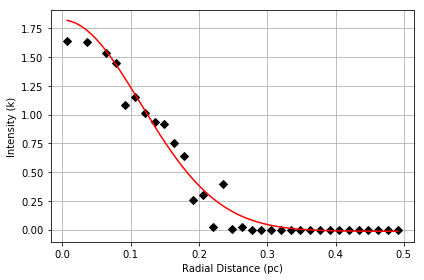

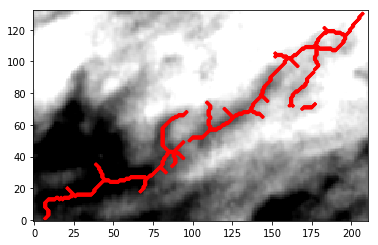

Filament: 1 / 2


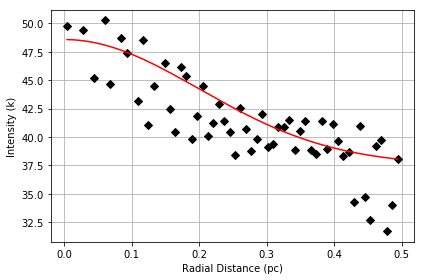

Filament: 2 / 2


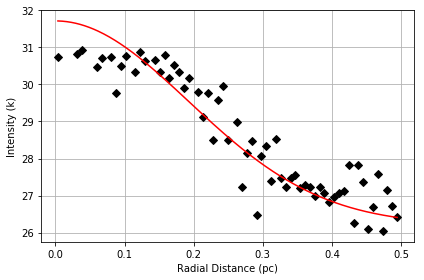

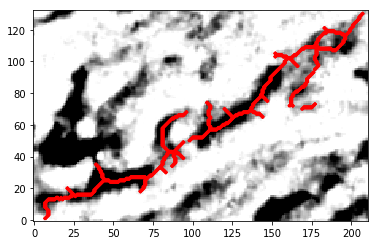

Filament: 1 / 2


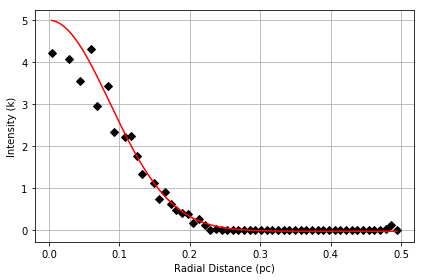

Filament: 2 / 2


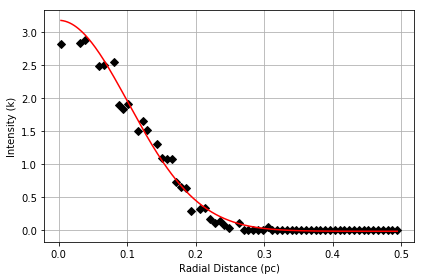

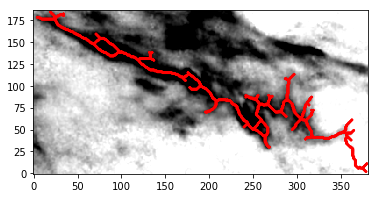

Filament: 1 / 1


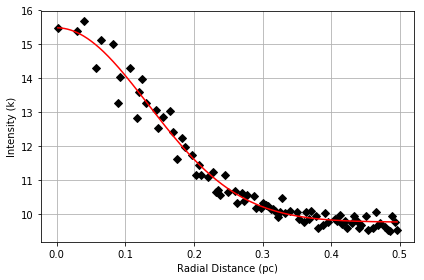

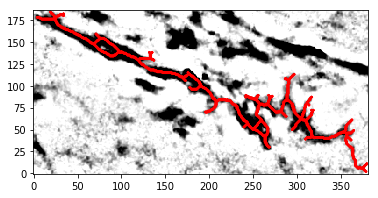

Filament: 1 / 1


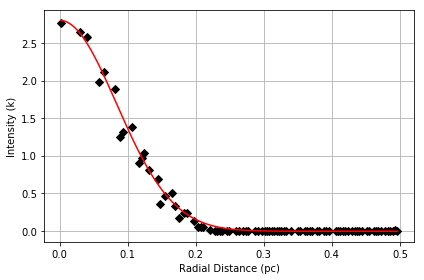

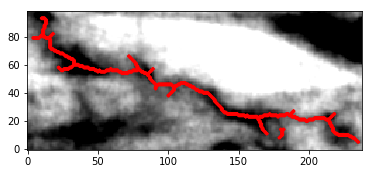

Filament: 1 / 1


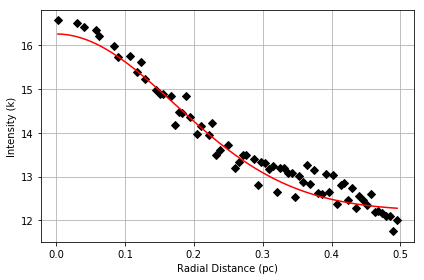

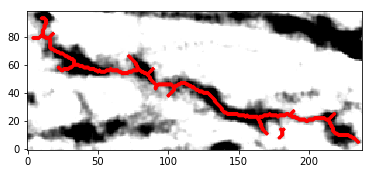

Filament: 1 / 1


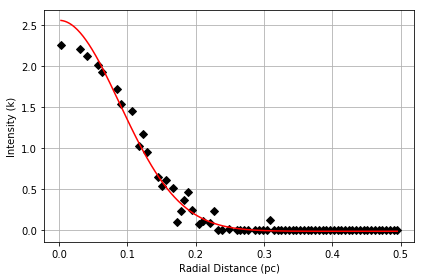

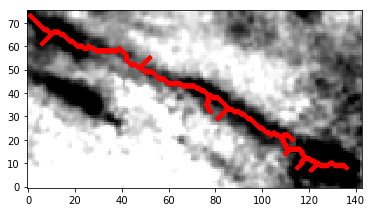

Filament: 1 / 1


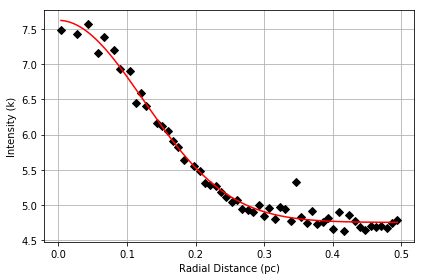

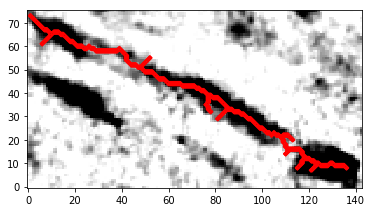

Filament: 1 / 1


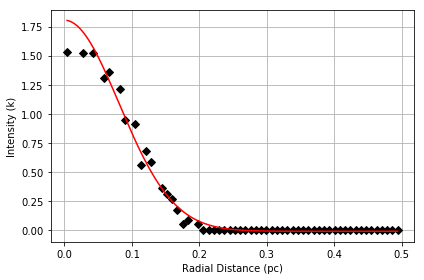

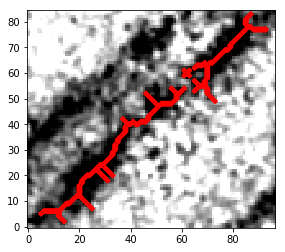

Filament: 1 / 2


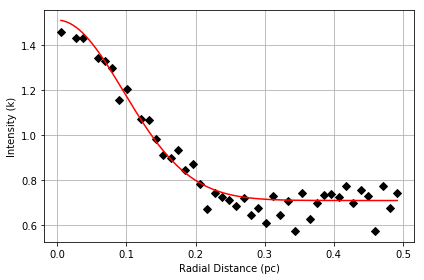

Filament: 2 / 2


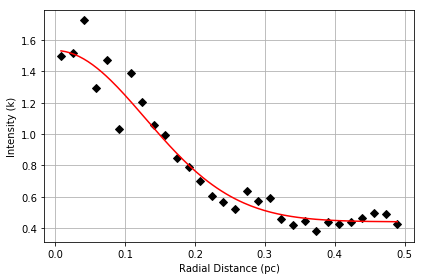

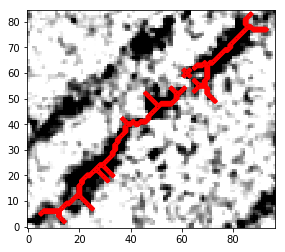

Filament: 1 / 2


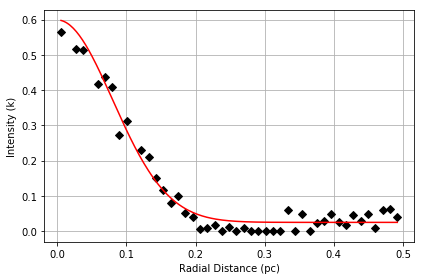

Filament: 2 / 2


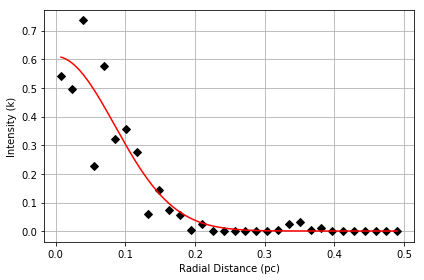

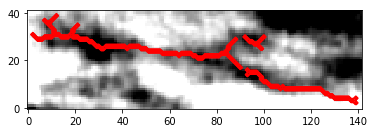

Filament: 1 / 2


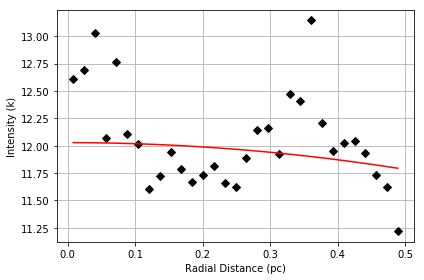

Filament: 2 / 2


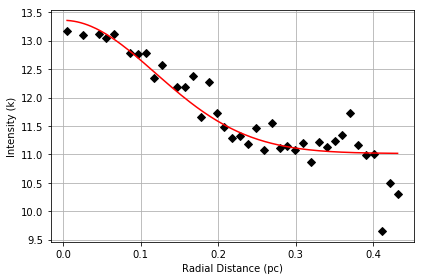

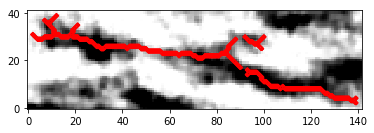

Filament: 1 / 2


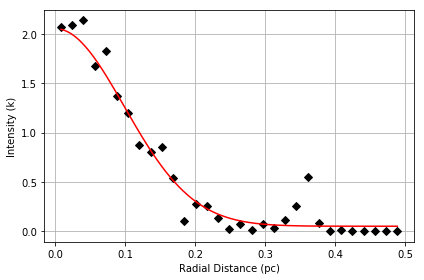

Filament: 2 / 2


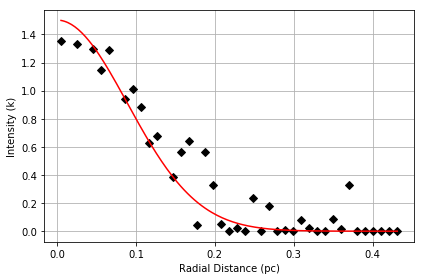

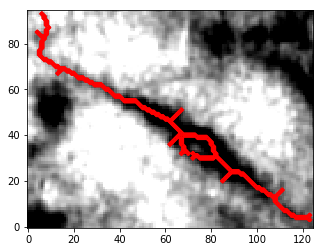

Filament: 1 / 1


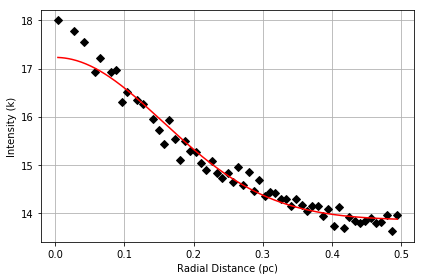

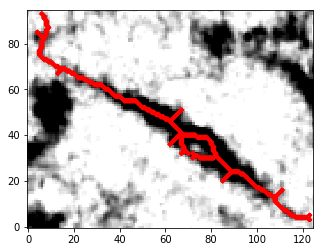

Filament: 1 / 1


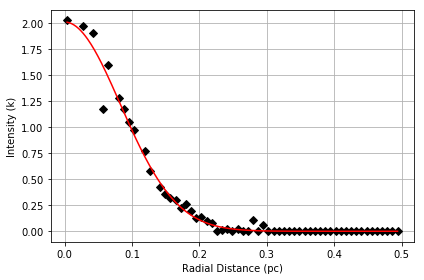

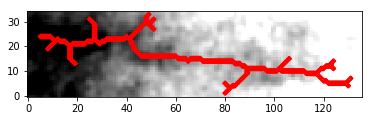

Filament: 1 / 1


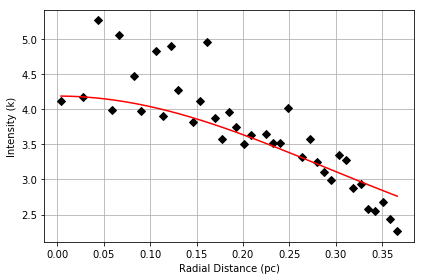

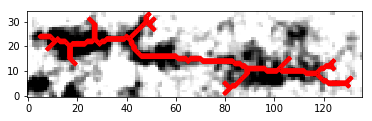

Filament: 1 / 1


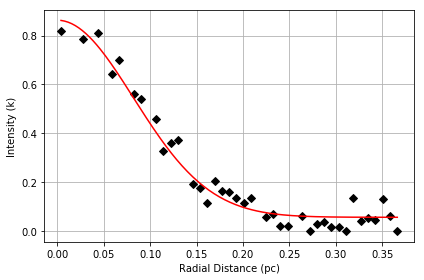

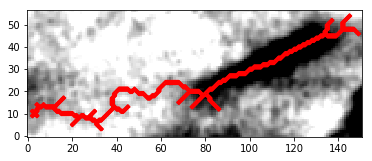

Filament: 1 / 1


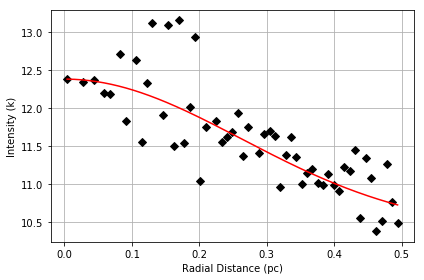

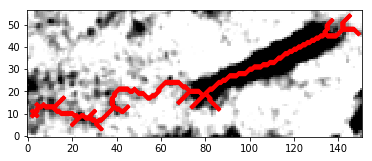

Filament: 1 / 1


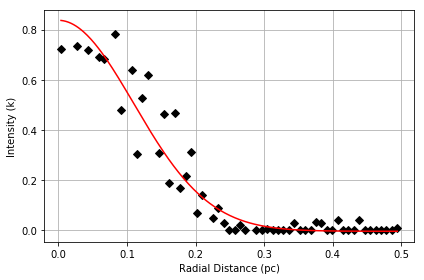

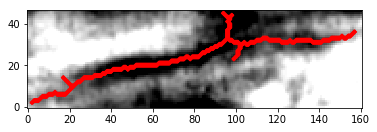

Filament: 1 / 1


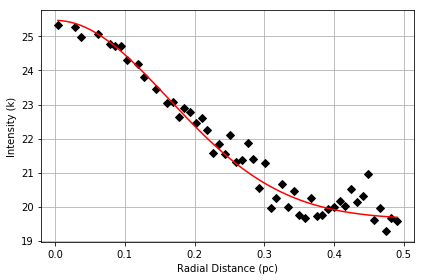

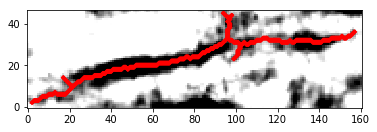

Filament: 1 / 1


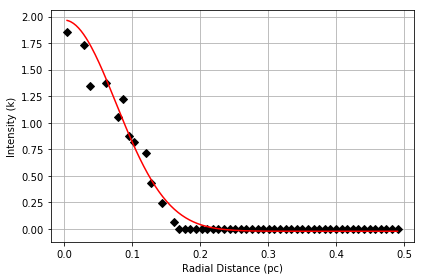

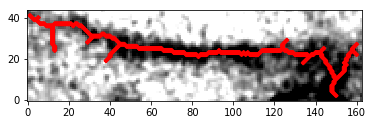

Filament: 1 / 1


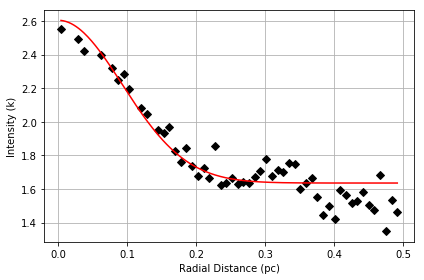

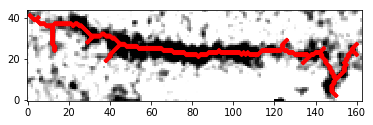

Filament: 1 / 1


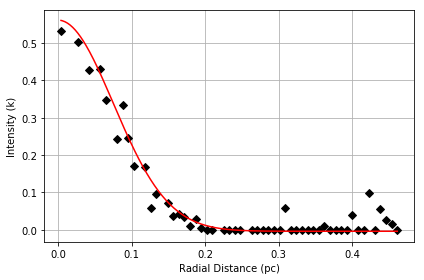

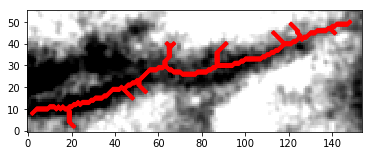

Filament: 1 / 1


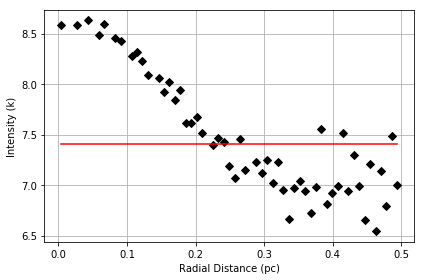

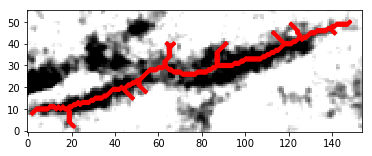

Filament: 1 / 1


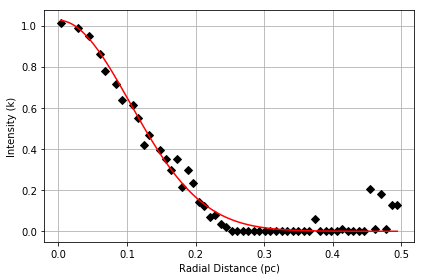

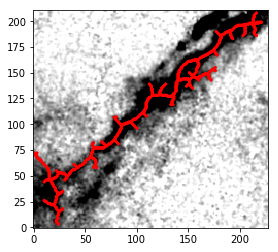

Filament: 1 / 1


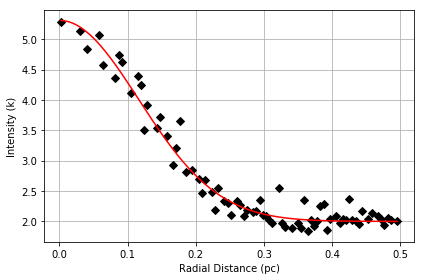

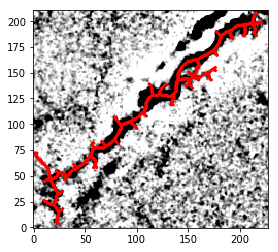

Filament: 1 / 1


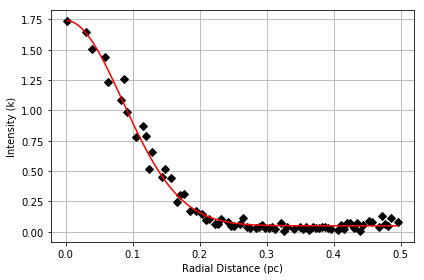

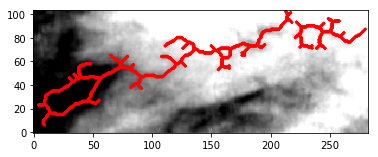

Filament: 1 / 2


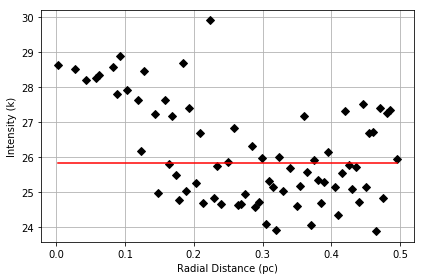

Filament: 2 / 2


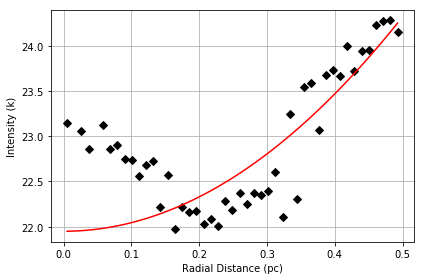

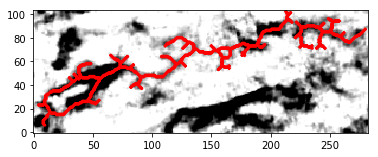

Filament: 1 / 2


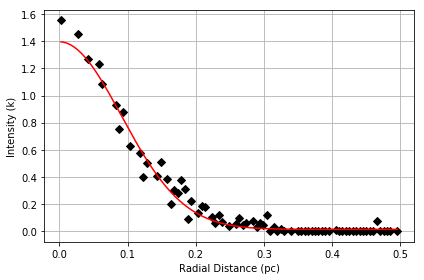

Filament: 2 / 2


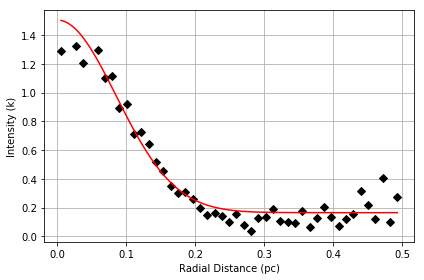

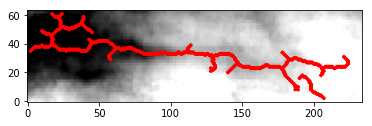

Filament: 1 / 1


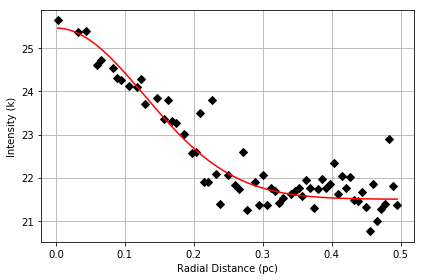

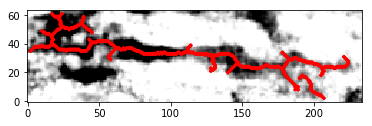

Filament: 1 / 1


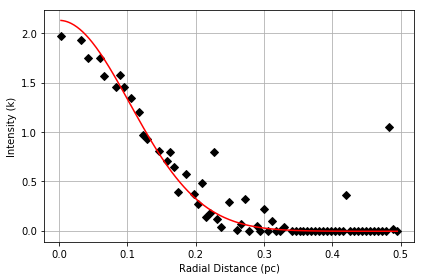

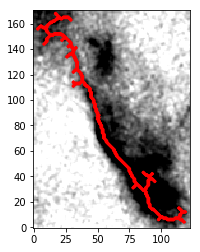

Filament: 1 / 1


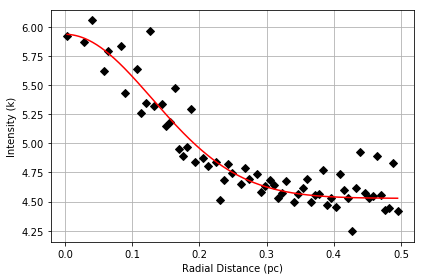

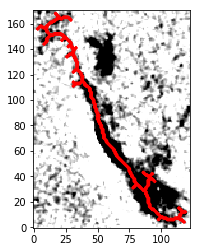

Filament: 1 / 1


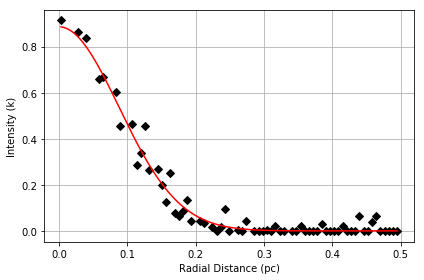

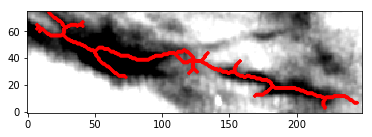

Filament: 1 / 1


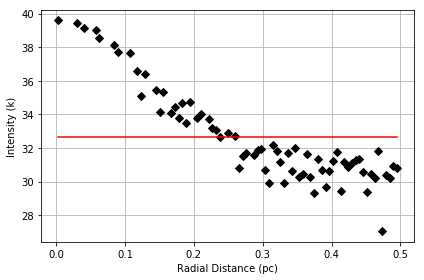

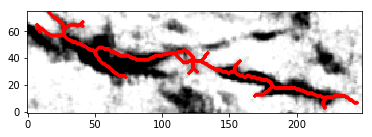

Filament: 1 / 1


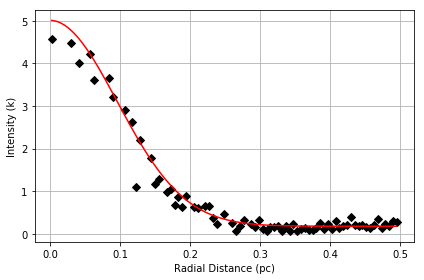

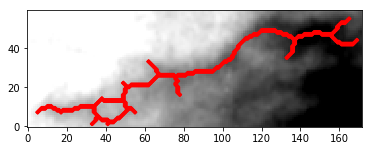

Filament: 1 / 1


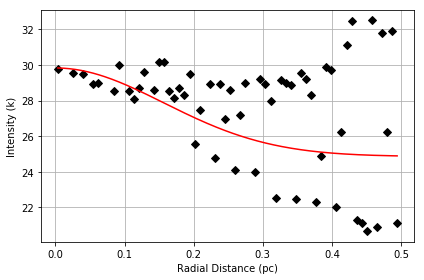

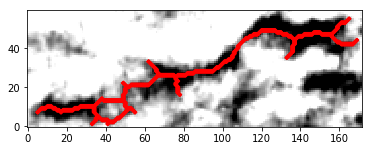

Filament: 1 / 1


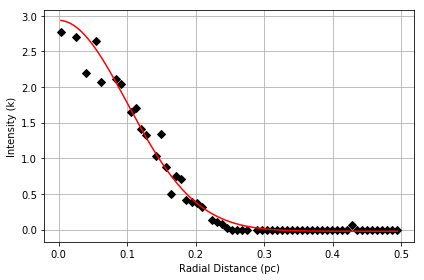

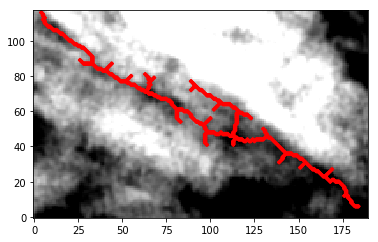

Filament: 1 / 1


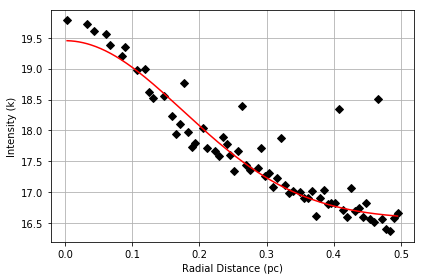

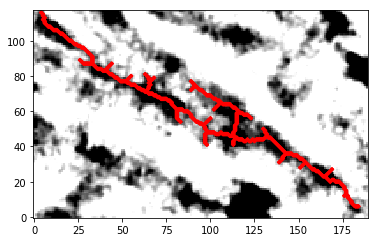

Filament: 1 / 1


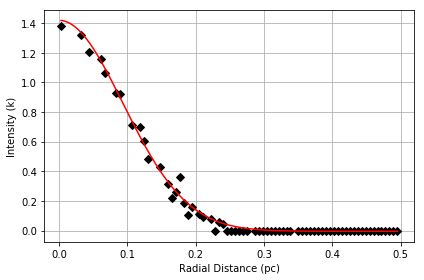

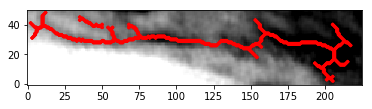

Filament: 1 / 1


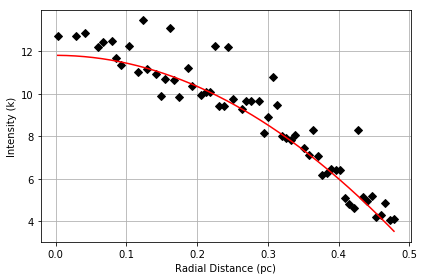

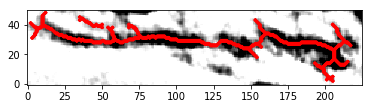

Filament: 1 / 1


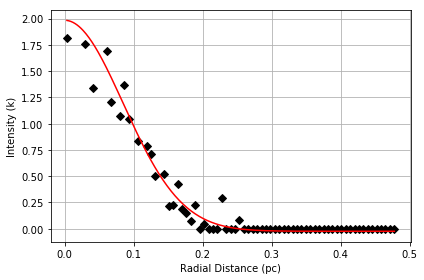

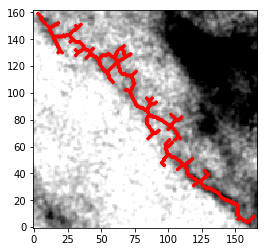

Filament: 1 / 2


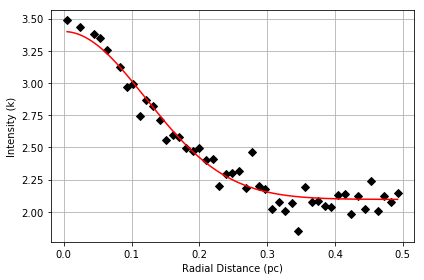

Filament: 2 / 2


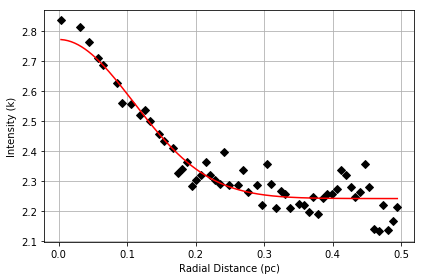

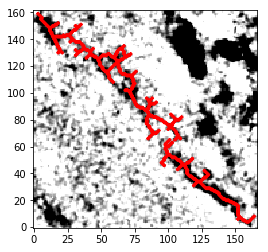

Filament: 1 / 2


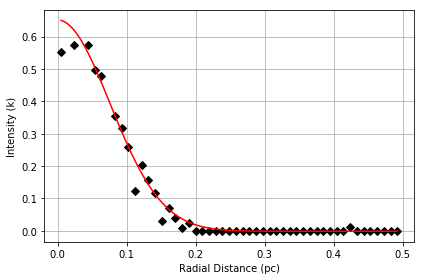

Filament: 2 / 2


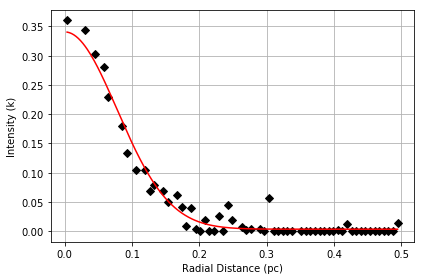

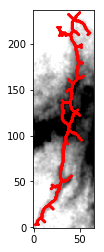

Filament: 1 / 1


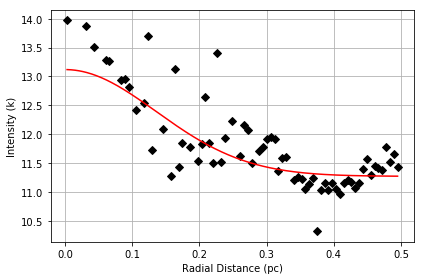

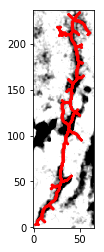

Filament: 1 / 1


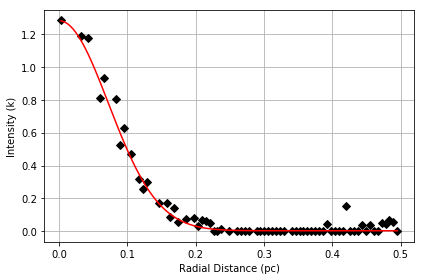

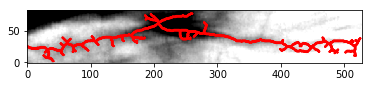

Filament: 1 / 1


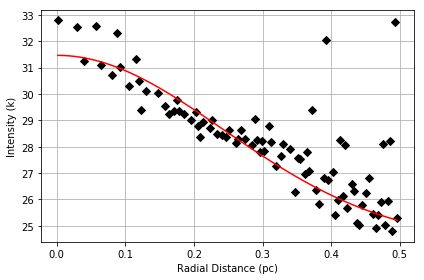

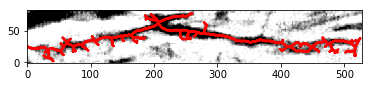

Filament: 1 / 1


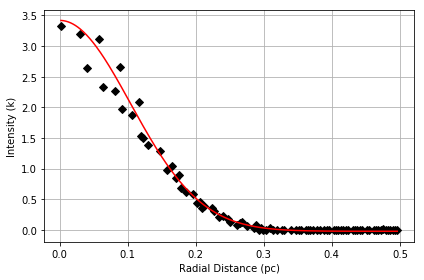

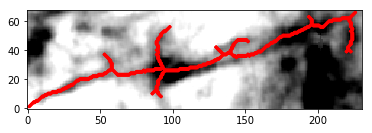

Filament: 1 / 1


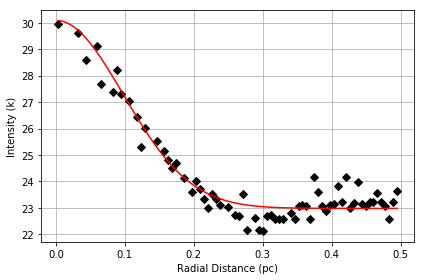

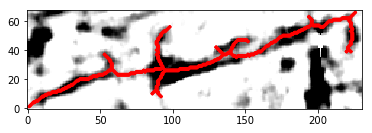

Filament: 1 / 1


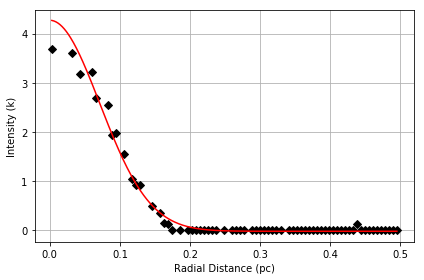

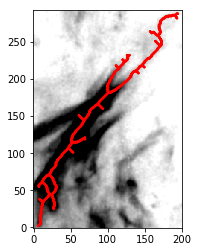

Filament: 1 / 1


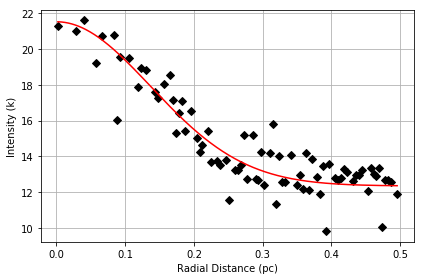

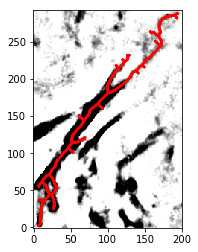

Filament: 1 / 1


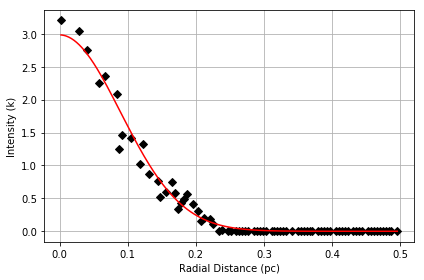

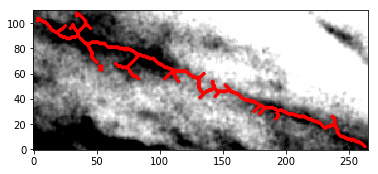

Filament: 1 / 1


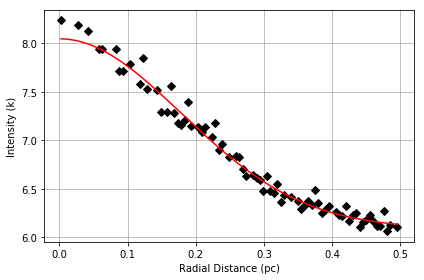

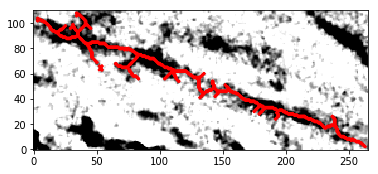

Filament: 1 / 1


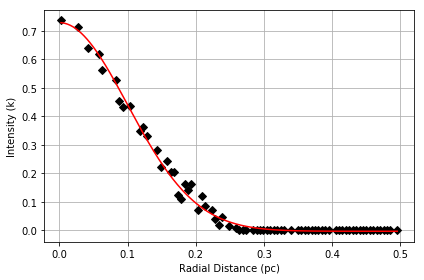

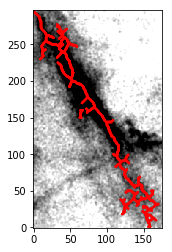

Filament: 1 / 2


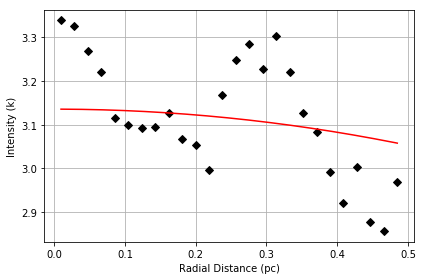

Filament: 2 / 2


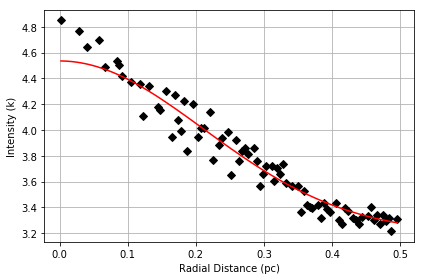

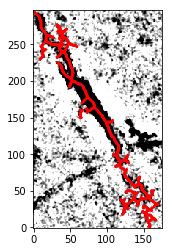

Filament: 1 / 2


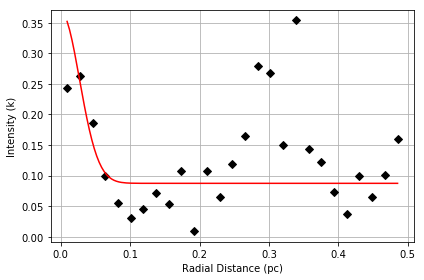

Filament: 2 / 2


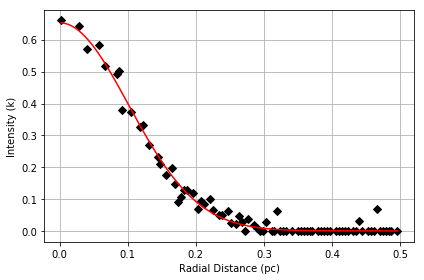

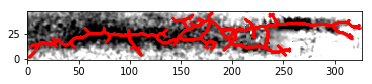

Filament: 1 / 1


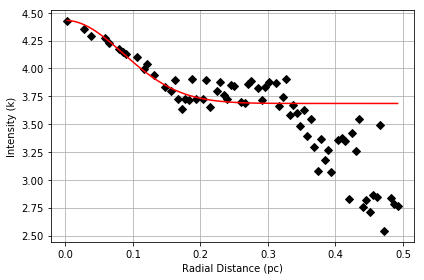

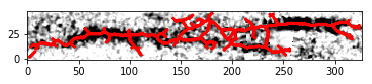

Filament: 1 / 1


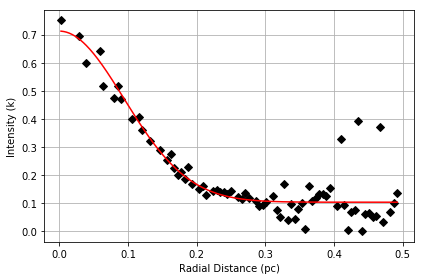

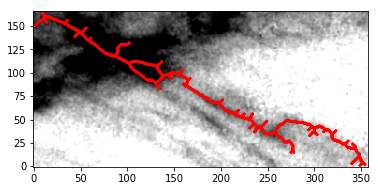

Filament: 1 / 1


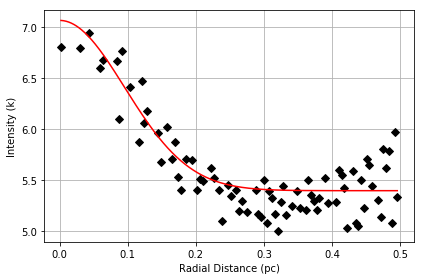

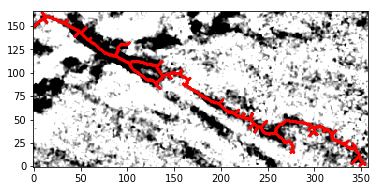

Filament: 1 / 1


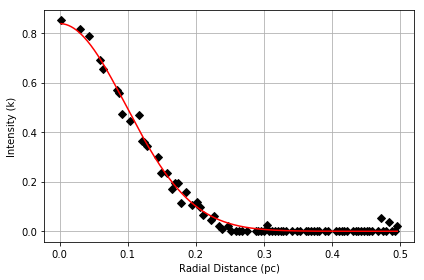

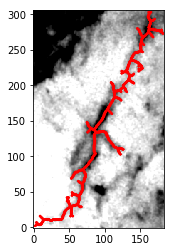

Filament: 1 / 1


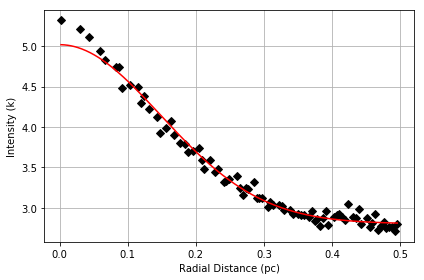

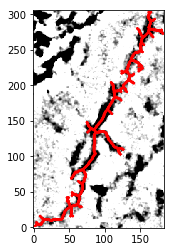

Filament: 1 / 1


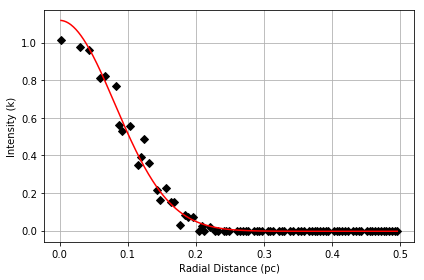

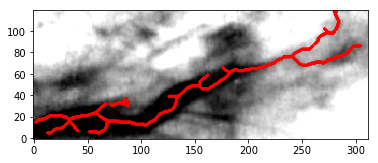

Filament: 1 / 2


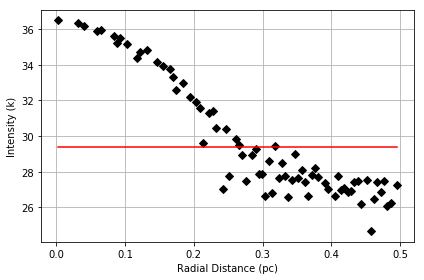

Filament: 2 / 2


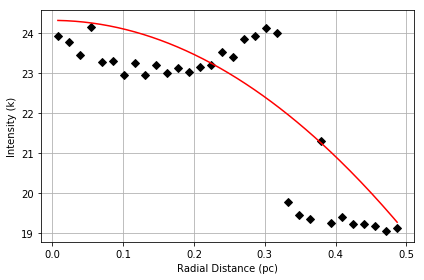

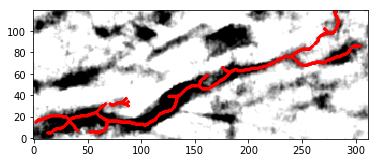

Filament: 1 / 2


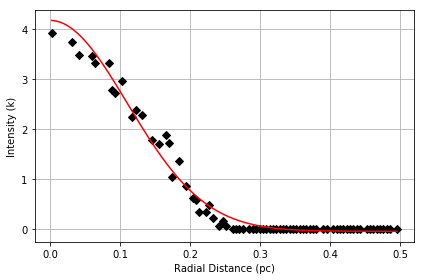

Filament: 2 / 2


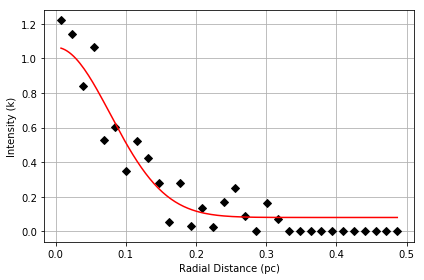

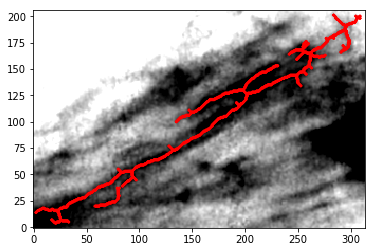

Filament: 1 / 2


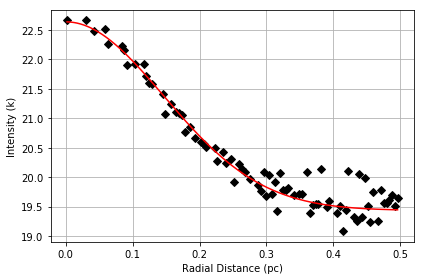

Filament: 2 / 2


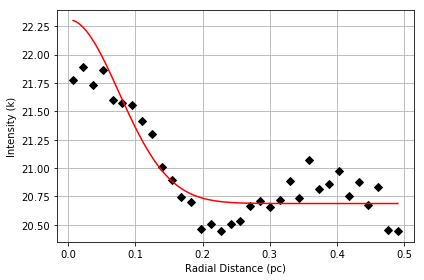

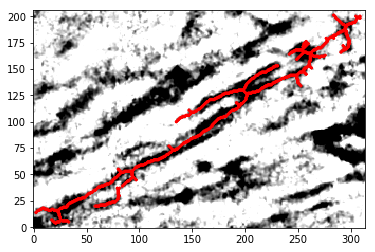

Filament: 1 / 2


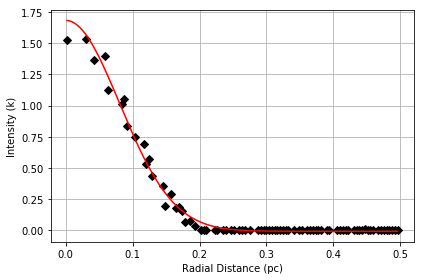

Filament: 2 / 2


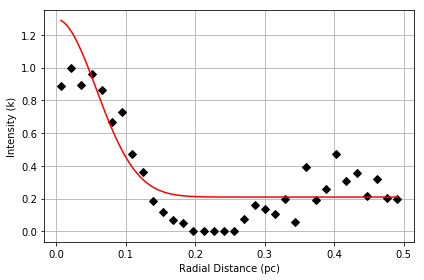

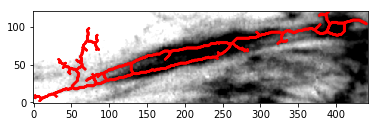

Filament: 1 / 1


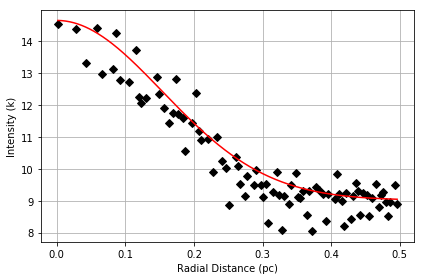

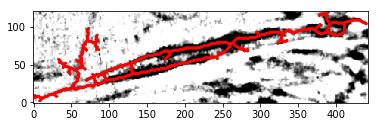

Filament: 1 / 1


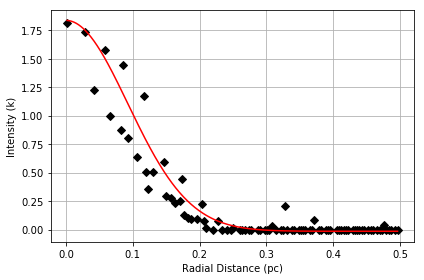

In [23]:
for k in sample:
    graph_width_comp_for_tree(trees[k], k, usm=False)